# CNN Image Classifier

**CNN** (Convolutional Neural Network) is a type of a newural network where the
data is directed through a number of convolutional layers.

The idea is that the *convolutional layers* are processed in groups of 2d or 3d
smaller parts (kernels), and patterns are first identified from these kernels,
and then the patterns of kernel groupings are identified in the next levels. Thus,
we also have growing levels of abstraction.

In order to increase the level of abstraction, each *convolutional* layer is
followed by a *pooling* layer, where the size of the overall matrix is made
smaller *(downsampled)* by a specified value, thus also increasing the level of
abstraction.

*CNN* are usually used for image classification.

In [5]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras import datasets, layers, models
%matplotlib inline

import tensorflow as tf
print("Num GPUs Available: ", len(tf.config.list_physical_devices('GPU')))

Num GPUs Available:  1


## Source data

The source data for the CNN is a hard thing to collect and process. Lots of
labeled images are required to train and test the CNN, and it takes some long
time to precess the image data.

That is why we will be using the CIFAR-10 labeled imageset. The CIFAR-10 dataset
consists of 60000 32x32 colour images in 10 classes, with 6000 images per class.
There are 50000 training images and 10000 test images.

See https://keras.io/api/datasets/cifar10/

Generally, CIFAR-10 images are of somewhat poor quality, some of them can not
be even classified by a human. Thus, we will not be expecting stellar results.

Here is a sample set of the first few images.

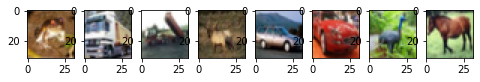

In [6]:
(X_train, y_train), (X_test, y_test) = datasets.cifar10.load_data()

def showline(array):
    fig = plt.figure(figsize=(8, 8))
    for i in range(1, 9):
        img = array[i - 1]
        fig.add_subplot(1, 8, i)
        plt.imshow(img)
    plt.show()


showline(X_train)

## Preparing the data

The images are 2d matrices, with each dot encoded by 3 channels (RGB). Each
channel value can be 0 to 255. Thus, we can divide the array values by 255.
Numpy allows dividing arrays in a simple way.

In [7]:
print('Before:')
print(X_train[0][0][0])

X_train = X_train / 255.0
X_test = X_test / 255.0

print('After:')
print(X_train[0][0][0])

Before:
[59 62 63]
After:
[0.23137255 0.24313725 0.24705882]


## The Convolutional network

The CNN consists for 2 convolutional layers with the kernel size of 3x3, relu-
activated.

For the first layer, the input shape is specified - 32x32 pixels, 3 channels
each.

Each convolutional layer is followed by a downsample layer.

Finally, the data is flattened for the dense layer. The classifier part has 2
dense layers. The last dense layer has the dimensinality that corresponds to the
number of classification labels.

In [13]:
cnn = models.Sequential([
    layers.Conv2D(filters=32, kernel_size=(3, 3),
                  activation='relu',
                  input_shape=(32, 32, 3)),
    layers.MaxPooling2D(pool_size=(2, 2)),
    layers.Dropout(0.2),

    layers.Conv2D(filters=64,
                  kernel_size=(3, 3),
                  activation='relu'),

    layers.Flatten(),
    layers.Dense(512, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(10, activation='softmax')
])

cnn.compile(optimizer='adam',
            loss='sparse_categorical_crossentropy',
            metrics=['accuracy'])

cnn.fit(X_train, y_train, epochs=5)

cnn.evaluate(X_test,y_test)

Epoch 1/5
1563/1563 [==============================] - 9s 5ms/step - loss: 1.4559 - accuracy: 0.4763

[0.84079509973526, 0.704200029373169]

## Results analysis

After playing with the hyper-parameters, the best results I was able to achieve
were around 0.7, which is not stellar, but also not bad given the simplicity of
the CNN and the poor quality of the images.

The final output prints an array of 20 items accompanied by 20 guesses.

In [9]:
y_pred = cnn.predict(X_test)
y_classes = np.asarray([np.argmax(element) for element in y_pred])
print(y_classes[:20])

y_test = y_test.reshape(-1,)
print(y_test[:20])

[3 8 8 0 4 6 3 6 5 9 0 9 5 7 9 6 5 7 8 6]
[3 8 8 0 6 6 1 6 3 1 0 9 5 7 9 8 5 7 8 6]
